<a href="https://colab.research.google.com/github/joseortegalabra/MLBI/blob/master/Tarea1_MLBI_Jos%C3%A9_Ignacio_Ortega_Labra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip list
#!pip freeze
#!pip show pandas numpy tensorflow matplotlib sklearn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as kr
from sklearn.model_selection import train_test_split
from platform import python_version
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [187]:
print('Version de python: ',python_version())
print('Version numpy:', np.__version__)
print('Version pandas:', pd.__version__)
print('Version tensorflow:', tf.__version__)
#print('Version sklearn:', sklearn.__version__)

Version de python:  3.6.9
Version numpy: 1.18.3
Version pandas: 1.0.3
Version tensorflow: 2.2.0-rc3


In [0]:
#!git clone https://github.com/joseortegalabra/MLBI.git

## Pregunta 1

#### Exploración base de datos

In [189]:
path1 = 'https://raw.githubusercontent.com/joseortegalabra/MLBI/master/Tarea1/dataset1.xlsx'
data1 = pd.read_excel(path1)
data1.head()

,crr_Nom,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster
0,INGENIERIA CIVIL INDUSTRIAL,783,653,685,672,735,-73.16487,-36.978759,38,20.201244,1,0,1,0,0,C2
1,INGENIERIA CIVIL BIOMEDICA,799,705,713,686,756,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C1
2,INGENIERIA CIVIL QUIMICA,688,543,612,534,638,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C3
3,INGENIERIA CIVIL ELECTRICA,605,598,658,601,633,-73.16487,-36.978759,21,20.201244,0,1,1,0,0,C2
4,INGENIERIA CIVIL INFORMATICA,603,710,668,651,657,-73.16487,-36.978759,19,20.201244,0,1,1,0,0,C2


In [190]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7866 entries, 0 to 7865
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   crr_Nom                   7866 non-null   object 
 1   psu_Nem                   7866 non-null   int64  
 2   psu_Leng                  7866 non-null   int64  
 3   psu_Mate                  7866 non-null   int64  
 4   psu_Cie                   7866 non-null   int64  
 5   psu_Pond                  7866 non-null   int64  
 6   Longitud                  7866 non-null   float64
 7   Latitud                   7866 non-null   float64
 8   cred_apr                  7866 non-null   int64  
 9   distancia                 7866 non-null   float64
 10  F                         7866 non-null   int64  
 11  M                         7866 non-null   int64  
 12  PARTICULAR_SUBVENCIONADO  7866 non-null   int64  
 13  PARTICULAR_PAGADO         7866 non-null   int64  
 14  MUNICIPA

La base de datos tiene 15 características, no tiene ningún valor nulo y todos los datos son del tipo numérico a excepción de crr_Nom (Nombre de la carerra estudiada) y cluster (señal a aprender, clasificación del cluster de cada estudiante)


En primer lugar dividir la base de datos en entrenamiento y testeo para evitar errores data Leakage

In [191]:
data1['cluster'].value_counts()

C2    3631
C3    1773
C1    1332
C4    1130
Name: cluster, dtype: int64

In [192]:
data1['crr_Nom'].value_counts()

INGENIERIA CIVIL - PLAN COMUN             1010
INGENIERIA CIVIL INDUSTRIAL                795
INGENIERIA CIVIL BIOMEDICA                 651
INGENIERIA CIVIL METALURGICA               614
INGENIERIA CIVIL                           604
INGENIERIA CIVIL QUIMICA                   600
INGENIERIA CIVIL INFORMATICA               563
INGENIERIA CIVIL ELECTRONICA               548
INGENIERIA CIVIL MECANICA                  543
INGENIERIA CIVIL EN TELECOMUNICACIONES     536
INGENIERIA CIVIL DE MATERIALES             483
INGENIERIA CIVIL ELECTRICA                 480
INGENIERÍA CIVIL DE MINAS                  263
INGENIERIA CIVIL AEROESPACIAL              176
Name: crr_Nom, dtype: int64

#### Ajustar base de datos a formato numérico

In [193]:
#crear datos dummy manteniendo el DataFrame
def createDummies(df, var, prefijo):
  '''
  input dataframe y un string con EL nombre de la variable a eliminar y nombre del prefijo que quiero que aparesca
  en formato string
  '''
  dummy = pd.get_dummies(df[var], prefix = prefijo)
  df = df.drop(var, axis = 1)
  df = pd.concat([df, dummy], axis = 1)
  return df

data1 = createDummies(data1,'crr_Nom', 'crr')
#data_prueba = data1.copy()
data1.head()

,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster,crr_INGENIERIA CIVIL,crr_INGENIERIA CIVIL - PLAN COMUN,crr_INGENIERIA CIVIL AEROESPACIAL,crr_INGENIERIA CIVIL BIOMEDICA,crr_INGENIERIA CIVIL DE MATERIALES,crr_INGENIERIA CIVIL ELECTRICA,crr_INGENIERIA CIVIL ELECTRONICA,crr_INGENIERIA CIVIL EN TELECOMUNICACIONES,crr_INGENIERIA CIVIL INDUSTRIAL,crr_INGENIERIA CIVIL INFORMATICA,crr_INGENIERIA CIVIL MECANICA,crr_INGENIERIA CIVIL METALURGICA,crr_INGENIERIA CIVIL QUIMICA,crr_INGENIERÍA CIVIL DE MINAS
0,783,653,685,672,735,-73.16487,-36.978759,38,20.201244,1,0,1,0,0,C2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,799,705,713,686,756,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,688,543,612,534,638,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,605,598,658,601,633,-73.16487,-36.978759,21,20.201244,0,1,1,0,0,C2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,603,710,668,651,657,-73.16487,-36.978759,19,20.201244,0,1,1,0,0,C2,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [194]:
#cluster en forma numérica
def n_cluster(row):
  if row == 'C1':
    return 1
  elif row == 'C2':
    return 2
  elif row == 'C3':
    return 3
  else:
    return 4

#data1['cluster'].map(n_cluster)
data1.loc[:, 'cluster'] = data1['cluster'].map(n_cluster)
data1.head()

,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster,crr_INGENIERIA CIVIL,crr_INGENIERIA CIVIL - PLAN COMUN,crr_INGENIERIA CIVIL AEROESPACIAL,crr_INGENIERIA CIVIL BIOMEDICA,crr_INGENIERIA CIVIL DE MATERIALES,crr_INGENIERIA CIVIL ELECTRICA,crr_INGENIERIA CIVIL ELECTRONICA,crr_INGENIERIA CIVIL EN TELECOMUNICACIONES,crr_INGENIERIA CIVIL INDUSTRIAL,crr_INGENIERIA CIVIL INFORMATICA,crr_INGENIERIA CIVIL MECANICA,crr_INGENIERIA CIVIL METALURGICA,crr_INGENIERIA CIVIL QUIMICA,crr_INGENIERÍA CIVIL DE MINAS
0,783,653,685,672,735,-73.16487,-36.978759,38,20.201244,1,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,799,705,713,686,756,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,688,543,612,534,638,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,605,598,658,601,633,-73.16487,-36.978759,21,20.201244,0,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,603,710,668,651,657,-73.16487,-36.978759,19,20.201244,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Separar en entrenamiento y test

In [0]:
#columnas
features = list(set(data1.columns.tolist())-set(['cluster']))
X_train, X_test, y_train, y_test = train_test_split(data1[features], data1['cluster'], test_size = 0.2, random_state = 0)

In [196]:
#tamaño sets
print('Tamaño data entrenamiento X:', X_train.shape)
print('Tamaño data entrenamiento y:', y_train.shape)
print('Tamaño data test X:', X_test.shape)
print('Tamaño data test y:', y_test.shape)

Tamaño data entrenamiento X: (6292, 28)
Tamaño data entrenamiento y: (6292,)
Tamaño data test X: (1574, 28)
Tamaño data test y: (1574,)


In [0]:
#min max scaler de los datos
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

#### Prueba regresion logística en sklean

In [0]:
from sklearn.linear_model import LogisticRegression

In [199]:
lr = LogisticRegression(random_state = None)
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
lr.predict(X_train)

array([2, 2, 2, ..., 2, 2, 2])

In [201]:
lr.predict_proba(X_train)

array([[8.32051299e-03, 7.91540587e-01, 1.30262961e-01, 6.98759389e-02],
       [3.19293751e-01, 6.76883705e-01, 3.77755588e-03, 4.49883968e-05],
       [3.18856392e-02, 7.88375259e-01, 1.74813115e-01, 4.92598707e-03],
       ...,
       [5.21925673e-02, 9.37086632e-01, 1.04112241e-02, 3.09576690e-04],
       [1.21252840e-01, 8.34245086e-01, 4.44444332e-02, 5.76417075e-05],
       [9.37916038e-03, 4.78130595e-01, 4.21083285e-01, 9.14069594e-02]])

In [202]:
print ('Accurancy set entrenamiento: {:.5f}'.format(lr.score(X_train, y_train)))
print ('Accurancy set testeo: {:.5f}'.format(lr.score(X_test, y_test)))

Accurancy set entrenamiento: 0.79704
Accurancy set testeo: 0.79543


In [203]:
#f1 score
from sklearn.metrics import f1_score
print('F1 score conjunto de entrenamiento')
print('Macro:', f1_score(y_train, lr.predict(X_train), average='macro'))
print('Micro:', f1_score(y_train, lr.predict(X_train), average='micro'))
print('Weighted:', f1_score(y_train, lr.predict(X_train), average='weighted'))
print('De cada clase:', f1_score(y_train, lr.predict(X_train), average=None))

F1 score conjunto de entrenamiento
Macro: 0.7805251688328955
Micro: 0.7970438652256834
Weighted: 0.7958292857033599
De cada clase: [0.79960707 0.84177109 0.72596327 0.75475924]


In [204]:
print('F1 score conjunto de entrenamiento')
print('Macro:', f1_score(y_test, lr.predict(X_test), average='macro'))
print('Micro:', f1_score(y_test, lr.predict(X_test), average='micro'))
print('Weighted:', f1_score(y_test, lr.predict(X_test), average='weighted'))
print('De cada clase:', f1_score(y_test, lr.predict(X_test), average=None))

F1 score conjunto de entrenamiento
Macro: 0.7748162840646444
Micro: 0.795425667090216
Weighted: 0.7937047267950424
De cada clase: [0.80679406 0.842711   0.72164948 0.7281106 ]


In [205]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
print('Matriz de confusión TRAIN\n')
confusion_matrix(y_train, lr.predict(X_train))

Matriz de confusión TRAIN



array([[ 814,  276,    0,    0],
       [ 132, 2519,  188,   37],
       [   0,  243, 1008,  163],
       [   0,   71,  167,  674]])

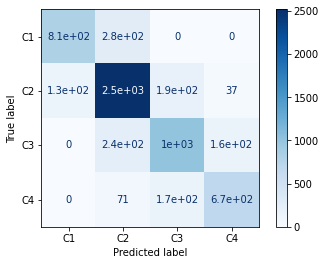

In [206]:
from sklearn.metrics import plot_confusion_matrix
etiqueta_cluster = ['C1', 'C2', 'C3', 'C4']
#agrandar grafico
plot_confusion_matrix(lr, X_train, y_train,
                                 display_labels=etiqueta_cluster,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

In [207]:
print('Matris de confusión TEST\n')
confusion_matrix(y_test, lr.predict(X_test))

Matris de confusión TEST



array([[190,  52,   0,   0],
       [ 39, 659,  39,  18],
       [  0,  74, 245,  40],
       [  0,  24,  36, 158]])

Matriz de confusión TEST normalizada


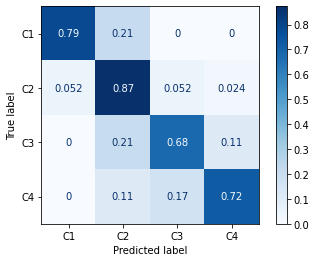

In [208]:
print('Matriz de confusión TEST normalizada')
etiqueta_cluster = ['C1', 'C2', 'C3', 'C4']
#agrandar grafico
plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=etiqueta_cluster,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
#normalizada puede ser true, pred, all, None

In [209]:
# Reporte resumen

etiqueta_cluster = ['C1', 'C2', 'C3', 'C4']
print('Reporte resumen TRAIN')
print(classification_report(y_train, lr.predict(X_train), target_names = etiqueta_cluster))


Reporte resumen TRAIN
              precision    recall  f1-score   support

          C1       0.86      0.75      0.80      1090
          C2       0.81      0.88      0.84      2876
          C3       0.74      0.71      0.73      1414
          C4       0.77      0.74      0.75       912

    accuracy                           0.80      6292
   macro avg       0.80      0.77      0.78      6292
weighted avg       0.80      0.80      0.80      6292



In [210]:
print('Reporte resumen TEST')
print(classification_report(y_test, lr.predict(X_test), target_names = etiqueta_cluster))

Reporte resumen TEST
              precision    recall  f1-score   support

          C1       0.83      0.79      0.81       242
          C2       0.81      0.87      0.84       755
          C3       0.77      0.68      0.72       359
          C4       0.73      0.72      0.73       218

    accuracy                           0.80      1574
   macro avg       0.79      0.77      0.77      1574
weighted avg       0.79      0.80      0.79      1574



#### Usando TF 2

In [211]:
#haciendo todo el preprocesamiento y obteniendo las bases de datos de entrenamiento y test
print('Tamaño data entrenamiento X:', X_train.shape)
print('Tamaño data entrenamiento y:', y_train.shape)
print('Tamaño data test X:', X_test.shape)
print('Tamaño data test y:', y_test.shape)

Tamaño data entrenamiento X: (6292, 28)
Tamaño data entrenamiento y: (6292,)
Tamaño data test X: (1574, 28)
Tamaño data test y: (1574,)


In [0]:
#a la variable y restarle 1 para dejarlo en los rangos 0 a 3 que admite keras
y_train = y_train - 1
y_test = y_test - 1

In [0]:
#se supone que tengo que dividir en 4 categorias
#y_train = pd.get_dummies(y_train)
#y_test = pd.get_dummies(y_test)

##### Utilizando keras

In [0]:
#parametros de NN
lr = 0.001  #learning rate por defecto en adam es 0.001
epochs = 50 #número de iteraciones
batch_size = 50 #por defecto es 32
nn = [X_train.shape[1], 16, 4] #número de neuronas por layer

In [0]:
#modelo
model_lr = kr.Sequential()
#capa 1
l1 = model_lr.add(kr.layers.Dense(nn[1], activation = 'relu'))
#capa 2
l2 = model_lr.add(kr.layers.Dense(nn[2], activation = 'softmax'))

In [0]:
#compilar el modelo
adam_optimizer = kr.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_lr.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = adam_optimizer,
                 metrics = ['accuracy'])
#kr.losses.sparse_categorical_crossentropy    #otra funcion de perdida posible
#'categorical_crossentropy'

In [217]:
history = model_lr.fit(
    X_train,   #X entrenamiento
    y_train,  # y entrenamiento
    batch_size = batch_size,
    verbose = 1,       # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
    epochs = epochs, #iteraciones
    validation_data =  (X_test, y_test)#tiene que ser una tupla X_test, y_test
    )


Epoch 1/50
126/126 [==============================] - 0s 2ms/step - loss: 1.2702 - accuracy: 0.4398 - val_loss: 1.1700 - val_accuracy: 0.4886
Epoch 2/50
126/126 [==============================] - 0s 2ms/step - loss: 1.1082 - accuracy: 0.5086 - val_loss: 0.9795 - val_accuracy: 0.6131
Epoch 3/50
126/126 [==============================] - 0s 2ms/step - loss: 0.9319 - accuracy: 0.6093 - val_loss: 0.8377 - val_accuracy: 0.6506
Epoch 4/50
126/126 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.6413 - val_loss: 0.7738 - val_accuracy: 0.6963
Epoch 5/50
126/126 [==============================] - 0s 2ms/step - loss: 0.7773 - accuracy: 0.6523 - val_loss: 0.7257 - val_accuracy: 0.6963
Epoch 6/50
126/126 [==============================] - 0s 2ms/step - loss: 0.7382 - accuracy: 0.6709 - val_loss: 0.6969 - val_accuracy: 0.7065
Epoch 7/50
126/126 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.6887 - val_loss: 0.6716 - val_accuracy: 0.7166
Epoch 

In [218]:
model_lr.summary() #ver la cantidad de variables del modelo

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             multiple                  464       
_________________________________________________________________
dense_50 (Dense)             multiple                  68        
Total params: 532
Trainable params: 532
Non-trainable params: 0
_________________________________________________________________


In [219]:
print('\nhistory dict:', history.history) 
#entra un diccionario con el acurrancy y con funciones de perdida


history dict: {'loss': [1.270226001739502, 1.1082160472869873, 0.9319323301315308, 0.8319506645202637, 0.7772775888442993, 0.7381616830825806, 0.7088027000427246, 0.6825965642929077, 0.6590422987937927, 0.6374366283416748, 0.6184365749359131, 0.6016594171524048, 0.5859804749488831, 0.5704621076583862, 0.5576651692390442, 0.545516312122345, 0.534663200378418, 0.5245062112808228, 0.5139583349227905, 0.5041700601577759, 0.49611201882362366, 0.4870225787162781, 0.4790547788143158, 0.4701031744480133, 0.46490541100502014, 0.45940104126930237, 0.45358848571777344, 0.44831496477127075, 0.44324296712875366, 0.4391736686229706, 0.4343699514865875, 0.4326186180114746, 0.428597629070282, 0.4255563020706177, 0.42223623394966125, 0.4193572402000427, 0.41725024580955505, 0.4141145646572113, 0.4125305116176605, 0.41001129150390625, 0.40845638513565063, 0.4058171510696411, 0.40351787209510803, 0.4024921655654907, 0.4002446234226227, 0.39881300926208496, 0.3981647491455078, 0.3966365158557892, 0.39479

In [220]:
print('resultados iteraciones loss y accurancy TRAIN')
#history.history['accuracy']
#history.history['loss']
print('resultados iteraciones loss y accurancy TEST')
#history.history['val_accuracy']   #test - validacion accurancy
#history.history['val_loss']   #test - validacion perdida

resultados iteraciones loss y accurancy TRAIN
resultados iteraciones loss y accurancy TEST


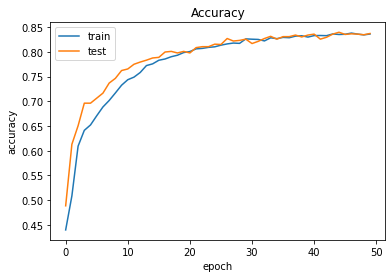

In [221]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

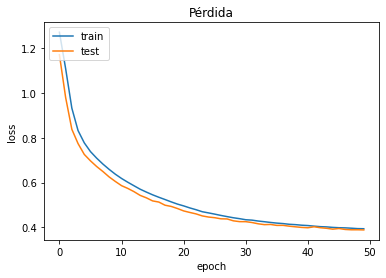

In [222]:
# funcion de perdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


In [223]:
train_loss, train_acc = model_lr.evaluate(X_train, y_train)
test_loss, test_acc = model_lr.evaluate(X_test, y_test)
print('Ultima iteración')
print('Función de costo TRAIN:' , train_loss)
print('Accuracy TRAIN:', train_acc)

print('\nFución de costo TEST:', test_loss)
print('Accuracy TEST:', test_acc)  

50/50 [==============================] - 0s 1ms/step - loss: 0.3874 - accuracy: 0.8374
Ultima iteración
Función de costo TRAIN: 0.390210896730423
Accuracy TRAIN: 0.8396376371383667

Fución de costo TEST: 0.38740694522857666
Accuracy TEST: 0.8373570442199707


In [224]:
#por ejemplo metrica con sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model_lr.predict_classes(X_test))

0.8373570520965693

In [0]:
#predicciones de clases
y_train_predict = model_lr.predict_classes(X_train)
y_test_predict = model_lr.predict_classes(X_test)

In [226]:
#valor numerico de prediccion
model_lr.predict(X_train)
model_lr.predict(X_test)

array([[4.1767052e-08, 3.2615955e-03, 5.2483815e-01, 4.7190025e-01],
       [1.0800160e-04, 6.3309848e-01, 3.1331909e-01, 5.3474441e-02],
       [2.3149229e-04, 8.7694383e-01, 1.1984634e-01, 2.9783647e-03],
       ...,
       [2.5741352e-02, 8.5074484e-01, 1.2345596e-01, 5.7788195e-05],
       [7.9429164e-08, 5.3148628e-03, 6.1793089e-01, 3.7675425e-01],
       [9.8516315e-01, 1.4834208e-02, 2.7258795e-06, 2.1432553e-10]],
      dtype=float32)

##### comparación resultados train y test

#### Gráfico 2d para ver como predice el modelo

In [0]:
#pca entrenado con base de datos completa y transformada
from sklearn.decomposition import PCA
#pca = PCA(2)
#X_train_2d = pca.fit_transform(data1[features])
#fig = plt.figure(figsize=(10,10))
#plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=data1['cluster'])

In [0]:
#hacer el proceso inverso

In [0]:
#aa = min_max_scaler.inverse_transform(X_train)
#aa

In [0]:
#bb = pca.transform(aa)
#fig = plt.figure(figsize=(10,10))
#plt.scatter(bb[:,0], bb[:,1], c=y_train)

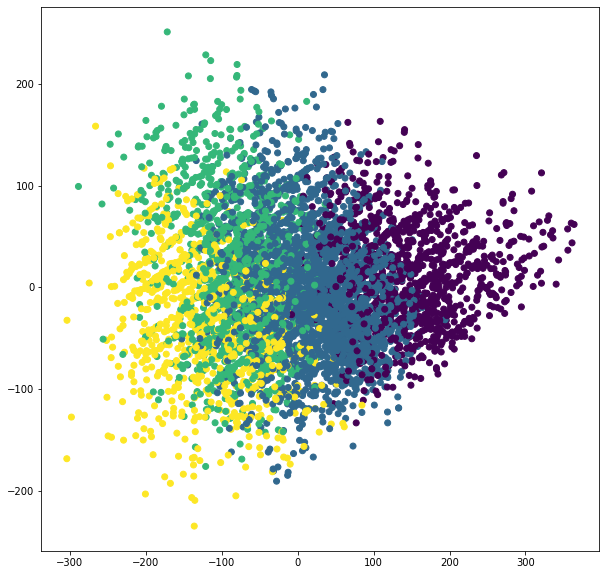

In [231]:
#y si hago el pca solo con los datos de entrenamiento
vv = min_max_scaler.inverse_transform(X_train)
pca = PCA(2)
X_train_2d = pca.fit_transform(vv)
fig = plt.figure(figsize=(10,10))
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train)

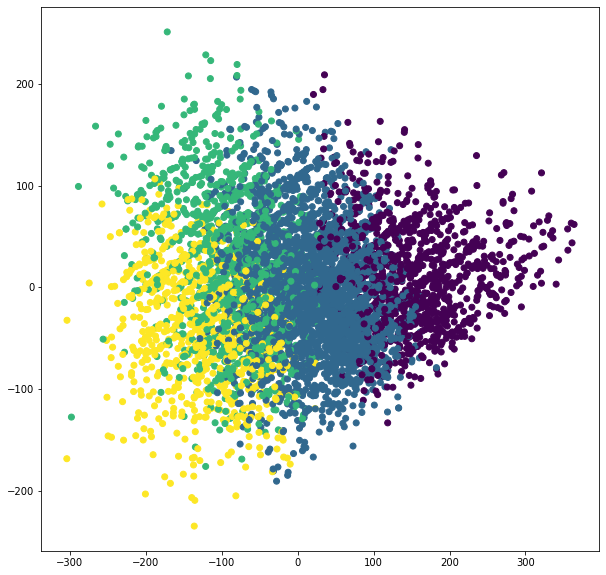

In [232]:
#gráfico con predicciones
fig = plt.figure(figsize=(10,10))
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train_predict)

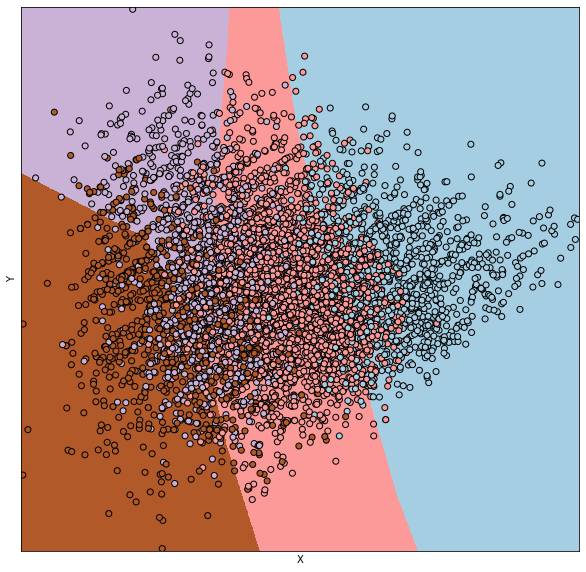

In [233]:
#y si hago el pca solo con los datos de entrenamiento  X_train y y_train
vv = min_max_scaler.inverse_transform(X_train)
pca = PCA(2)
X_2d = pca.fit_transform(vv)
##fig = plt.figure(figsize=(10,10))
##plt.scatter(X_2d[:,0], X_2d[:,1], c=y_train)


#proceso inverso
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_2d[:, 0].min() - 2., X_2d[:, 0].max() + 2.
y_min, y_max = X_2d[:, 1].min() - 2., X_2d[:, 1].max() + 2.
h = .5  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

data_fict_2d = np.c_[xx.ravel(), yy.ravel()]#tengo todos los puntos de mapa 2d (x1, y1), (x1,y2)

#data ficticia x,y trasformar a base de datos inverso pca y ajustar con min max
data_fict = min_max_scaler.transform(pca.inverse_transform(data_fict_2d))


# entrenar data ficticia
Z = model_lr.predict_classes(data_fict)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### TENSORFLOW 2

## Pregunta 2

In [234]:
path2 = 'https://raw.githubusercontent.com/joseortegalabra/MLBI/master/Tarea1/dataset2.csv'
data2 = pd.read_csv(path2)
data2.head(3)

,x,y,condition
0,7391.708670,5.898348e+06,1
1,48438.984252,5.946210e+06,1
2,-2768.592216,5.946243e+06,1


In [235]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81647 entries, 0 to 81646
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x          81647 non-null  float64
 1   y          81647 non-null  float64
 2   condition  81647 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.9 MB


In [0]:
data2['condition'] = data2['condition'].astype(float)

In [0]:
#ANTES DE USARLA AHCER LA TRANFORMACION DE DATAFRAME A NUMPY
def visualize_original_data2d(data, label, hight, widht):
  fig = plt.figure(figsize = ((hight, widht)))
  plt.title('Original Data 2D', fontsize = 25)
  plt.scatter(data[:,0], data[:, 1], c = label)

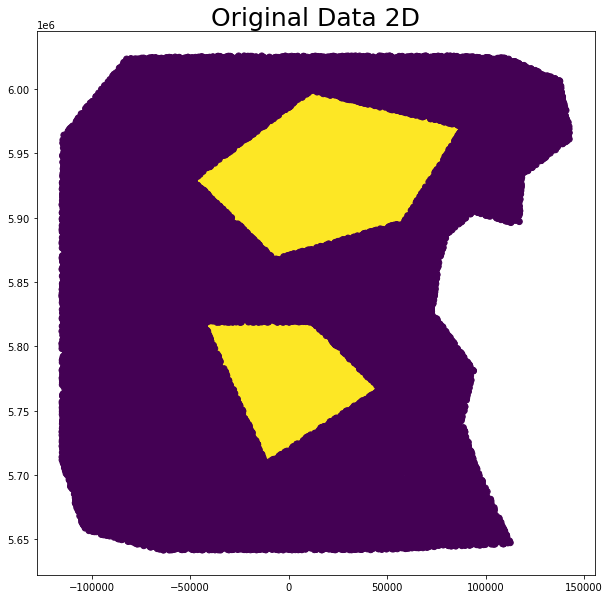

In [346]:
#plt.scatter(data2['x'], data2['y'], c = data2['condition'])
#data pregunta 2 fijarse que viene como dataframe
visualize_original_data2d(np.array(data2), np.array(data2['condition']), hight = 10, widht=10)

In [0]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data2[['x', 'y']], data2['condition'], test_size = 0.2, random_state = 0)

In [0]:
#print(X_train_2.shape)
#print(y_train_2.shape)
#print(X_test_2.shape)
#print(y_test_2.shape)

In [0]:
def visualize_data2d_train_test(X_2d_train, y_2d_train, X_2d_test, y_2d_test, prediction = False):
  fig, axs = plt.subplots(1, 2, figsize = ((20,10)))
  ax = axs[0]
  #train
  ax.scatter(X_2d_train[:,0], X_2d_train[:,1], c = y_2d_train)
  if(prediction == False):
    ax.set_title('Real Data Train', fontsize = 25)
  if(prediction == True):
    ax.set_title('Prediction Train', fontsize = 25)

  #test
  ax = axs[1]
  ax.scatter(X_2d_test[:,0], X_2d_test[:,1], c = y_2d_test)
  if(prediction == False):
    ax.set_title('Real Data Test', fontsize = 25)
  if(prediction == True):
    ax.set_title('Prediction Test', fontsize = 25)

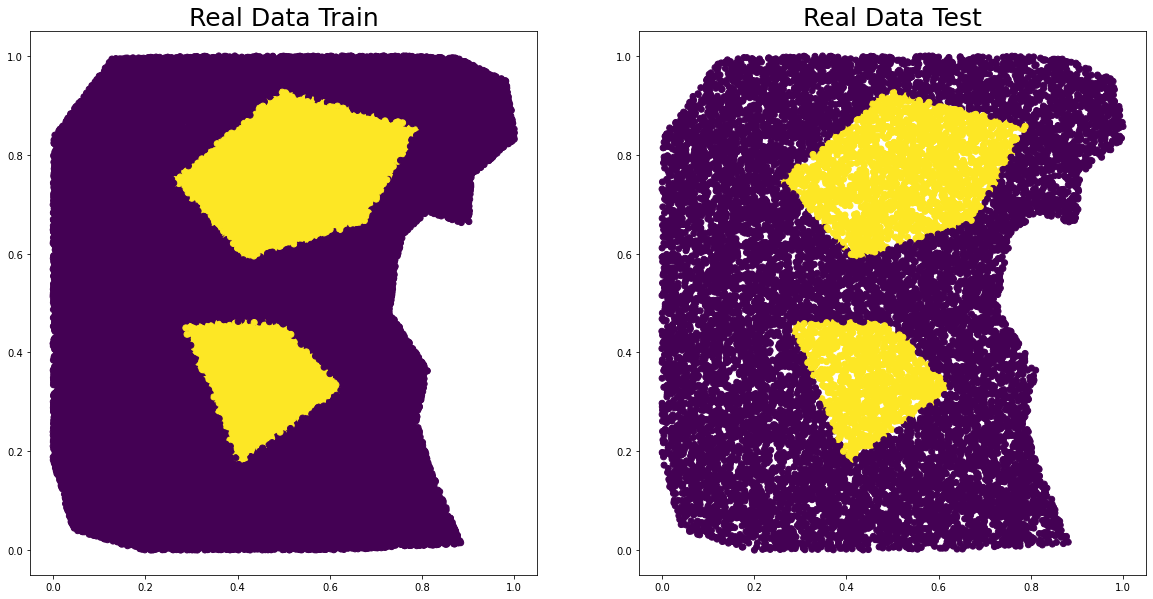

In [336]:
visualize_data2d_train_test(X_train_2, y_train_2, X_test_2, y_test_2, False)

In [0]:
scaler2 = MinMaxScaler()
X_train_2 = scaler2.fit_transform(X_train_2)
X_test_2 = scaler2.transform(X_test_2)
#devuelve como un array de np

#### Utilizando sklearn

In [242]:
lr2 = LogisticRegression()
lr2.fit(X_train_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
print(lr2.score(X_train_2, y_train_2))
print(lr2.score(X_test_2, y_test_2))

0.8019504876219055
0.8086344151867728


WITH SKLEARN


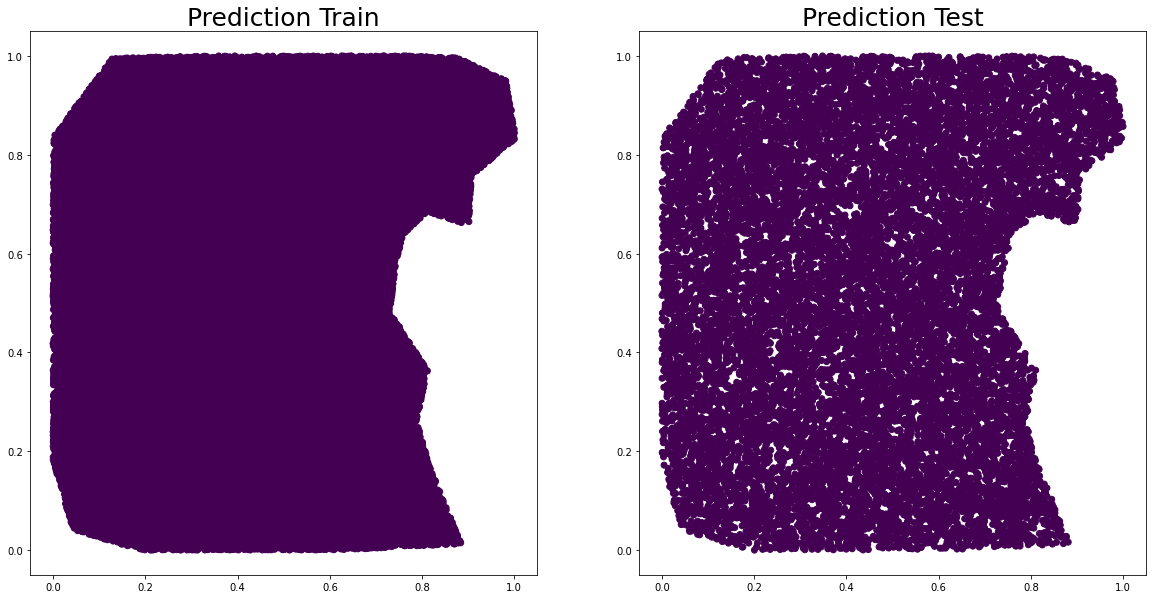

In [347]:
#plt.scatter(X_train_2[:, 0], X_train_2[:,1], c = lr2.predict(X_train_2))
print('WITH SKLEARN')
visualize_data2d_train_test(X_train_2,lr2.predict(X_train_2), X_test_2, lr2.predict(X_test_2), prediction=True )

### Keras

In [0]:
lr = 0.01
epochs = 500
batch_size = 10000
nn = [X_train_2.shape[1], 16, 16, 1]

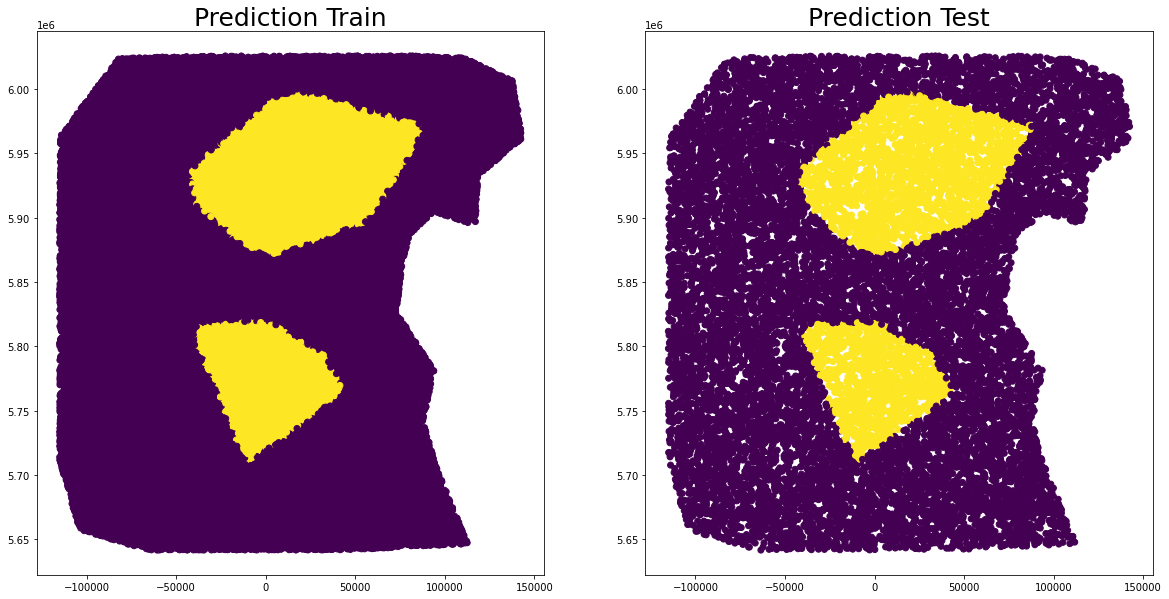

In [348]:
model_lr2 = kr.Sequential()
#primera capa reconozca cada una de las 9 lineas
m1 = model_lr2.add(kr.layers.Dense(nn[1], activation = 'relu'))

m2 = model_lr2.add(kr.layers.Dense(nn[2], activation = 'relu'))

#m3 = model_lr2.add(kr.layers.Dense(nn[3], activation = 'relu'))
#ultima capa diga si está en una de las 2 zonas
m3 = model_lr2.add(kr.layers.Dense(nn[3], activation = 'sigmoid'))

#compilar
adam_optimizer = kr.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999,amsgrad=False)
model_lr2.compile(loss = 'binary_crossentropy',
            optimizer = adam_optimizer,
            metrics = ['accuracy']
            )

#funciones perdida binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy

history2 = model_lr2.fit(
    X_train_2,
    y_train_2,
    batch_size = batch_size,
    verbose = 0,
    epochs = epochs,
    validation_data = (X_test_2, y_test_2)
)

#GRAFICAR
y_train_2_predict = model_lr2.predict_classes(X_train_2)
y_test_2_predict = model_lr2.predict_classes(X_test_2)

#graficar valores, ahora tengo que regresar el escalado inverso y ahi graficar
visualize_data2d_train_test(scaler2.inverse_transform(X_train_2),y_train_2_predict, scaler2.inverse_transform(X_test_2), 
                             y_test_2_predict, prediction = True)

In [0]:
def train_results(train_loss, test_loss, train_acc, test_acc):
  fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = ((14, 7)))
  ax = axs[0]
  ax.set_title('Loss', fontsize = 25)
  ax.grid(color = 'black', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
  ax.plot(train_loss, label = 'loss_train', color = 'black', linestyle = '-')
  ax.plot(test_loss, label = 'loss_test', color = 'orange')
  ax.set_xlabel('Epochs', fontsize = 13)
  ax.legend()

  ax = axs[1]
  ax.set_title('Accuracy', fontsize = 25)
  ax.grid(color = 'black', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
  ax.plot(train_acc, label = 'acc_train', color = 'black', linestyle = '-')
  ax.plot(test_acc, label = 'acc_test', color = 'orange')
  ax.set_xlabel('Epochs', fontsize = 13)
  plt.legend()

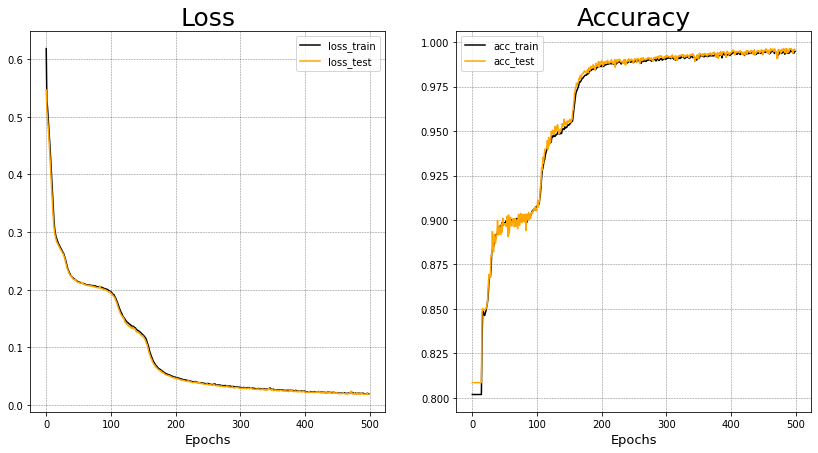

In [310]:
train_results(history2.history['loss'], history2.history['val_loss'], history2.history['accuracy'], history2.history['val_accuracy'] )

In [404]:
#RESUMEN CLASIFICACIÓN
print('------CLASSIFICATION REPORT TRAIN------')
print(classification_report(y_train_2, y_train_2_predict, digits= 4))

print('\n\n------CLASSIFICATION REPORT TEST------')
print(classification_report(y_test_2, y_test_2_predict, digits = 4))

------CLASSIFICATION REPORT TRAIN------
              precision    recall  f1-score   support

         0.0     0.9940    0.9949    0.9945     52381
         1.0     0.9792    0.9758    0.9775     12936

    accuracy                         0.9911     65317
   macro avg     0.9866    0.9853    0.9860     65317
weighted avg     0.9911    0.9911    0.9911     65317



------CLASSIFICATION REPORT TEST------
              precision    recall  f1-score   support

         0.0     0.9933    0.9952    0.9942     13205
         1.0     0.9794    0.9718    0.9756      3125

    accuracy                         0.9907     16330
   macro avg     0.9864    0.9835    0.9849     16330
weighted avg     0.9907    0.9907    0.9907     16330



In [0]:
def f1_score_train_test(y_train, y_train_predict, y_test, y_test_predict):
  print('F1 score conjunto de entrenamiento')
  print('Macro:', f1_score(y_train, y_train_predict, average='macro'))
  print('Micro:', f1_score(y_train, y_train_predict, average='micro'))
  print('Weighted:', f1_score(y_train, y_train_predict, average='weighted'))
  print('De cada clase:', f1_score(y_train, y_train_predict, average=None))

  print('\n\nF1 score conjunto de entrenamiento')
  print('Macro:', f1_score(y_test, y_test_predict, average='macro'))
  print('Micro:', f1_score(y_test, y_test_predict, average='micro'))
  print('Weighted:', f1_score(y_test, y_test_predict, average='weighted'))
  print('De cada clase:', f1_score(y_test, y_test_predict, average=None))

In [408]:
f1_score_train_test(y_train_2, y_train_2_predict, y_test_2, y_test_2_predict)

F1 score conjunto de entrenamiento
Macro: 0.9859803197272312
Micro: 0.9911049190869146
Weighted: 0.9910990794573581
De cada clase: [0.99445648 0.97750416]


F1 score conjunto de entrenamiento
Macro: 0.9849180404846614
Micro: 0.9906919779546847
Weighted: 0.9906782631388413
De cada clase: [0.99424983 0.97558625]


In [0]:
def confussion_matrix_train_test(y_train, y_train_predict, y_test, y_test_predict, normalize = True):
  confusion_matrix_train = confusion_matrix(y_train, y_train_predict)
  confusion_matrix_test = confusion_matrix(y_test, y_test_predict)
  fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = ((10, 5)))
  plt.subplots_adjust(hspace = 1)
  #train
  axs[0].set_xlabel('Prediction')
  axs[0].set_ylabel('True')
  if(normalize == False):
    sns.heatmap(pd.DataFrame(confusion_matrix_train), ax = axs[0] ,annot = True, fmt = 'd', linewidths=.5)
    axs[0].set_title('Confussion Matrix Train', fontsize = 15)
  if(normalize == True):
    sns.heatmap(pd.DataFrame(confusion_matrix_train).div(pd.DataFrame(confusion_matrix_train).sum(axis = 1), axis = 0), ax = axs[0] ,annot = True, fmt = '.3f', linewidths=.5)
    axs[0].set_title('Confussion Matrix Train Normalize', fontsize = 15)

  #test
  axs[1].set_xlabel('Prediction')
  axs[1].set_ylabel('True')
  if(normalize == False):
    sns.heatmap(pd.DataFrame(confusion_matrix_test), ax = axs[1], annot= True, fmt = 'd',  linewidths=.5)
    axs[1].set_title('Confussion Matrix Test', fontsize = 15)
  if(normalize == True):
    sns.heatmap(pd.DataFrame(confusion_matrix_test).div(pd.DataFrame(confusion_matrix_test).sum(axis = 1), axis = 0), ax = axs[1], annot = True, fmt = '.3f', linewidths=.5)
    axs[1].set_title('Confussion Matrix Test Normalize', fontsize = 15)

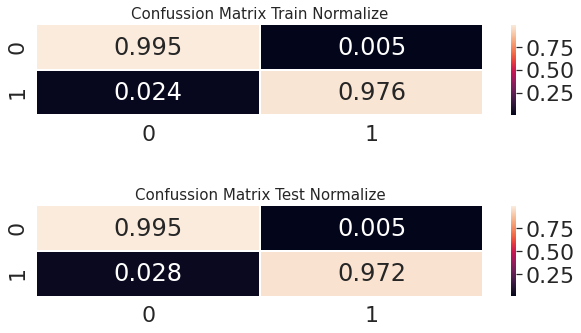

In [402]:
confussion_matrix_train_test(y_train_2, y_train_2_predict, y_test_2, y_test_2_predict, normalize = True)